# <center>  Loan Prosper Dataset Exploration </center>
## <center> by: Reem Mandour </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to hide the warnings displayed 
import warnings
warnings.filterwarnings('ignore')

The Data is taken from one of datasets in this <a href="https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True"> link</a><br>
<img src="ChosenDataset.jpg" alt="LoanDataset" title="Loan Data from Prosper" /><br>

We are interested to see factors affecting APR rates.
**************************************************************
**************************************************************

In [2]:
# Display columns and rows fully with no collapse
#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Load Data

In [3]:
# read data from CSV file
df_loan_Data = pd.read_csv('prosperLoanData.csv')

In [4]:
# display first five rows
df_loan_Data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# display all info about data
df_loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

After going through variables and assessing data throughly, it is normal for this dataset to have NAN values in some cells. These cells are either optional or not applicable to get filled based on loan case.
Let's directly dive deep into the exploration of our analyses to discover new insights about our question.

In [6]:
# take a copy of dataset to work on
df_loan_Data_copy = df_loan_Data.copy()

## Data Wrangling

### Assess Data:

Programmatic Assessment: <br>
`[1]`  Data has duplicate loan rows. When filtering data by ListingKey column, we get 871 duplicate loan row. The reason we donot get this duplicate result when when checking duplicates with whole data is they differ by ProsperScore.<br>
`[2]` The Loan status  **`Cancelled`** has missing data and is not needed in our analysis. <br>
`[3]` The credit score range columns are retrieved with float type.<br>
`[4]` 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate has blanks(NAN in loaded data' indicating **the borrower had no prior loans**.<br>
`[5]` TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate are loaded with incorrect datatype float64.<br>

In [7]:
# Assess Issue [1]
df_loan_Data_copy.duplicated().sum()

0

In [8]:
# Assess Issue [1]
df_loan_Data_copy.ListingKey.duplicated().sum()

871

In [9]:
# Assess Issue [2]
df_loan_Data_copy.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [10]:
# Assess Issue [2]
df_loan_Data_copy.query('LoanStatus == "Cancelled"')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
332,093D3365430569291709120,8912,2006-04-26 22:23:10.147000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,True,False,NaN,2006-04-26 22:08:11.393000000,520.0,539.0,1997-11-21 00:00:00,NaN,NaN,18.0,0,0.0,12.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10361,Not displayed,False,0.000000,886633657959281284DF4BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,94,668,1000,2006-05-01 00:00:00,Q2 2006,4E95336440121524707AE42,39.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,6
59998,F77F33664545520971829DC,7646,2006-04-25 07:59:15.203000000,C,36,Cancelled,2006-05-31 00:00:00,0.14659,0.1395,0.1345,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Administrative Assistant,Not available,NaN,True,False,NaN,2006-04-25 07:56:42,640.0,659.0,1995-08-28 00:00:00,NaN,NaN,31.0,0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21321,Not displayed,True,4166.666667,32773366339920232BFB8D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,94,766,2500,2006-05-08 00:00:00,Q2 2006,2932336610982263970437A,85.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,62
72480,09E1336627538645259AE42,908,2006-02-28 08:18:58.527000000,HR,36,Cancelled,2006-03-29 00:00:00,0.20735,0.2000,0.1950,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,CAC7336560237895229CE12,2006-02-16 11:41:07.423000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15248,Not displayed,True,3833.333333,493633654667845358BBA77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,96,125,3000,2006-03-06 00:00:00,Q1 2006,2CBF3366127093983629FE5,111.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23
97281,29453366240667435235AEE,11364,2006-05-05 03:16:59.510000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,NaN,NaN,NaN,NaN,NaN,NaN,0,NC,NaN,NaN,NaN,False,False,NaN,2006-05-05 03:00:35.130000000,500.0,519.0,1996-05-28 00:00:00,NaN,NaN,12.0,0,0.0,0.0,NaN,11.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01504,Not displayed,True,2600.000000,4630336434311592418390D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,94,889,1000,2006-05-15 00:00:00,Q2 2006,C9D53366460006104927C10,39.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,7
112975,E77E34330098056070F5C30,410006,2008-10-07 17:09:34.653000000,A,36,Cancelled,2008-10-16 00:00:00,0.16219,0.1075,0.0975,NaN,NaN,NaN,NaN,NaN,NaN,1,FL,Other,Full-time,30.0,False,False,NaN,2008-09-29 10:18:23.650000000,720.0,739.0,1993-04-01 00:00:00,9.

In [11]:
# Assess Issue [3]
df_loan_Data_copy[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].head()

,CreditScoreRangeLower,CreditScoreRangeUpper
0,640.0,659.0
1,680.0,699.0
2,480.0,499.0
3,800.0,819.0
4,680.0,699.0


In [12]:
# Assess Issue [4]
df_loan_Data_copy.TotalProsperPaymentsBilled.isnull().sum()

91852

In [13]:
# Assess Issue [4]
df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate.isnull().sum()

91852

In [14]:
# Assess Issue [4]
df_loan_Data_copy.ProsperPaymentsOneMonthPlusLate.isnull().sum()

91852

In [15]:
# Assess Issue [5]
print(df_loan_Data_copy.TotalProsperPaymentsBilled.dtype.name)
print(df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate.dtype.name)
print(df_loan_Data_copy.ProsperPaymentsOneMonthPlusLate.dtype.name)

float64
float64
float64


### Clean Data:
Quality Issue 1: data has duplicate loan rows when filtering with ListingKey.<br>
Quality Issue 2: drop rows with Loan status **`Cancelled`**.<br>
Quality Issue 3: change credit score columns type to int64.<br>
Quality issue 4: fill NAN values of 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate' with -1.<br>
Quality issue 5: change columns' type of 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate' to int64.<br>

#### Define:
**Quality Issue 1**: data has duplicate loan rows when filtering with ListingKey.

#### Code:

In [16]:
def drop_duplicates_based_on_prosper_value(df, columns):
    """
      The data has duplicate listing keys with different prosper (risk) scores. For accuracy,
      data under the same listing key with good APR rate not exceeding 28%  deserve a high 
      or good risk score, so keep row with maximum risk score and drop the rest.But, data
      under the same listing key with bad APR rate with 29% and more deserve a low or bad 
      risk score, so keep row with minimum risk score and drop the rest.
      
      Parameters:
      df: dataframe which contains data.
      Columns: list-like contains variables the function will work on, and 
      must have the follwing in order:
         base column: the primary key column or subset on which duplicate rows are retrieved 
                      ex: ListingKey or id.
         APR_column: The column which has APR rate assigned to borrower to check its value and
                     determing based on its value the risk score to keep.
         Proser Score: The risk score associate with each id. 
         
     Returns: 
     The function has no return statement, but it cleans data from any primary key duplicates based on
     APR and risk score value
      
    """
    base_column = columns[0]  # ListingKey Column 
    APR_column  = columns[1]  # BorrowerAPR
    prosper_score_column= columns[2]  # ProsperScore column
    df_view = df[df.duplicated(subset=base_column)]  # get duplicate listing keys or ids in a view
    list_key= df_view[base_column].values  # get all ids in a list to work on
    drop_index = []  # will contain indexes of rows to drop
    
    for val in list_key: # loop over ids in list
        df_view=df.query('{} == @val'.format(base_column))  # query all rows with specific listing key  
        if(df_view[APR_column].values[0] < 0.29):  # BorrowerAPR < 0.29
            max_value = df_view[prosper_score_column].max()  # good APR so keep good score(max) 
            for index, row in df_view.iterrows():  # drop rest of rows related to listing key
                if(row[prosper_score_column] != max_value):
                    drop_index.append(index)
        else: # BorrowerAPR > 0.29
            min_value = df_view[prosper_score_column].min()  # bad APR so keep bad score(min) 
            for index, row in df_view.iterrows():  # drop rest of rows related to listing key
                if(row[prosper_score_column] != min_value):
                    drop_index.append(index)
    
    print(len(drop_index))  # print the dropped rows count
    df.drop(drop_index, axis=0, inplace=True)  # drop rows not needed after check in dataframe
    df.reset_index(drop=True, inplace=True)  # reset dataframe index

In [17]:
drop_duplicates_based_on_prosper_value(df_loan_Data_copy, ['ListingKey', 'BorrowerAPR', 'ProsperScore'])

979


#### Test:

In [18]:
df_loan_Data_copy.ListingKey.duplicated().sum()

0

In [19]:
df_loan_Data_copy.shape

(113066, 81)

#### Define:
**Quality Issue 2**: drop rows with Loan status **`Cancelled`**.

#### Code:

In [20]:
# drop cancelled rows; these should drop 5 rows.
loan_status_to_drop = df_loan_Data_copy[ (df_loan_Data_copy['LoanStatus'].isin(['Cancelled']))].index
df_loan_Data_copy.drop(loan_status_to_drop, axis=0, inplace=True)

#### Test:

In [21]:
df_loan_Data_copy.shape

(113061, 81)

#### Define
**Quality Issue 3**: change credit score columns type to int64.

#### Code:

In [22]:
# fill NAN values with zero
df_loan_Data_copy.CreditScoreRangeLower.fillna(0, inplace=True)
df_loan_Data_copy.CreditScoreRangeUpper.fillna(19, inplace=True)
# convert to int64
df_loan_Data_copy.CreditScoreRangeLower = df_loan_Data_copy.CreditScoreRangeLower.astype(np.int64)
df_loan_Data_copy.CreditScoreRangeUpper = df_loan_Data_copy.CreditScoreRangeUpper.astype(np.int64)

#### Test:

In [23]:
df_loan_Data_copy.CreditScoreRangeLower.dtype.name

'int64'

In [24]:
df_loan_Data_copy.CreditScoreRangeUpper.dtype.name

'int64'

#### Define:
**Quality issue 4**: fill NAN values of 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate' with -1.

#### Code:

In [25]:
df_loan_Data_copy.TotalProsperPaymentsBilled.fillna(-1, inplace=True)
df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate.fillna(-1, inplace=True)
df_loan_Data_copy.ProsperPaymentsOneMonthPlusLate.fillna(-1, inplace=True)

#### Test:

In [26]:
df_loan_Data_copy.TotalProsperPaymentsBilled.value_counts()

-1.0      91138
 9.0       1623
 6.0       1215
 10.0      1132
 35.0      1064
 11.0      1031
 12.0       816
 7.0        779
 13.0       731
 14.0       662
 8.0        639
 15.0       554
 16.0       528
 17.0       483
 18.0       447
 1.0        417
 19.0       415
 20.0       415
 21.0       381
 23.0       324
 22.0       323
 2.0        302
 24.0       300
 36.0       297
 3.0        278
 34.0       266
 25.0       262
 27.0       261
 4.0        254
 33.0       254
          ...  
 102.0        6
 100.0        6
 112.0        5
 110.0        4
 117.0        4
 107.0        4
 106.0        4
 116.0        4
 105.0        4
 132.0        3
 118.0        3
 99.0         3
 104.0        2
 111.0        2
 124.0        2
 131.0        2
 125.0        2
 123.0        2
 128.0        2
 115.0        2
 121.0        1
 113.0        1
 122.0        1
 98.0         1
 119.0        1
 141.0        1
 134.0        1
 109.0        1
 120.0        1
 133.0        1
Name: TotalProsperPaymen

In [27]:
df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate.value_counts()

-1.0     91138
 0.0     18141
 1.0      1799
 2.0       658
 3.0       329
 4.0       204
 5.0       162
 7.0        95
 6.0        95
 9.0        60
 8.0        48
 10.0       45
 11.0       35
 15.0       27
 12.0       25
 17.0       25
 13.0       25
 14.0       22
 16.0       20
 24.0       11
 21.0       11
 26.0       11
 19.0       10
 20.0        9
 18.0        9
 25.0        9
 23.0        6
 22.0        6
 28.0        5
 42.0        3
 34.0        3
 32.0        2
 29.0        2
 27.0        2
 30.0        2
 39.0        1
 36.0        1
 33.0        1
 31.0        1
 41.0        1
 40.0        1
 35.0        1
Name: ProsperPaymentsLessThanOneMonthLate, dtype: int64

In [28]:
df_loan_Data_copy.ProsperPaymentsOneMonthPlusLate.value_counts()

-1.0     91138
 0.0     21541
 1.0       185
 2.0        68
 3.0        48
 4.0        19
 5.0        16
 7.0        16
 6.0         9
 8.0         5
 9.0         3
 21.0        3
 11.0        3
 19.0        3
 16.0        1
 12.0        1
 10.0        1
 18.0        1
Name: ProsperPaymentsOneMonthPlusLate, dtype: int64

#### Define:
**Quality issue 5**: change columns' type of 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate' to int64.

#### Code:

In [29]:
# use pandas astype series function
df_loan_Data_copy.TotalProsperPaymentsBilled = df_loan_Data_copy.TotalProsperPaymentsBilled.astype(np.int64)
df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate = df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate.astype(np.int64)
df_loan_Data_copy.ProsperPaymentsOneMonthPlusLate = df_loan_Data_copy.ProsperPaymentsOneMonthPlusLate.astype(np.int64)

#### Test:

In [30]:
print(df_loan_Data_copy.TotalProsperPaymentsBilled.dtype.name)
print(df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate.dtype.name)
print(df_loan_Data_copy.ProsperPaymentsOneMonthPlusLate.dtype.name)

int64
int64
int64


## Exploratory Data Analyses

### Univariate Exploration:

Our goal here is to check the univariate variables that affect the APR rate.According to article (ref.[2]), there are several factors that lenders consider when they determine the APR or interest rate. Let us go through them one by one.

min value: 0.006529999999999999, max value: 0.5122899999999999, mean: 0.2189809354541916


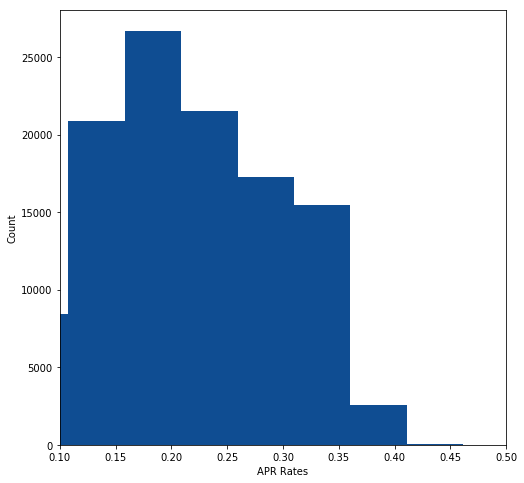

In [31]:
# Let's check APR rate to see what APR rates we have.
print('min value: {}, max value: {}, mean: {}'.format(df_loan_Data_copy.BorrowerAPR.min(), df_loan_Data_copy.BorrowerAPR.max(), df_loan_Data_copy.BorrowerAPR.mean()))
np_array_APR = df_loan_Data_copy.BorrowerAPR.sort_values(ascending=True).values
np_array_APR = np_array_APR[np.logical_not(np.isnan(np_array_APR))]  # ref [8] for removing NANs from array
plt.figure(figsize=[8, 8])
plt.hist(np_array_APR, bins=10, color='#0f4d92')
plt.xlim([0.1,0.5])
plt.xlabel('APR Rates')
plt.ylabel('Count')
plt.show();

Having the APR Rates skewed right gives a positive indication that we have clients with good credit scores and overall healthy loan eligibilty status. If we take the log scale, we will find multiplicative values skewed left to approach zero from $ 10 ^{-2} $.

Now, we need to check the categorical variables impacting APR. These variables are `Term`, `EmploymentStatus`, `ProsperScore(risk score)`. **We will Check categorical univariate variables with a bar chart**.

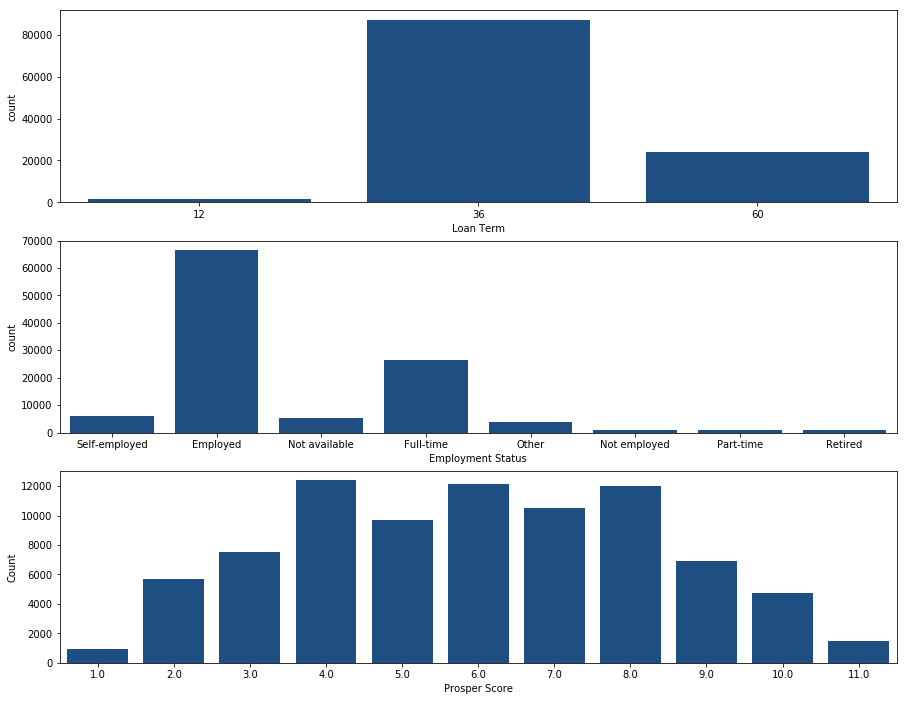

In [32]:
fig, ax = plt.subplots(nrows=3, figsize=[15, 12])
sns.countplot(data=df_loan_Data_copy, x='Term', color='#0f4d92', ax=ax[0])
ax[0].set_xlabel('Loan Term')

sns.countplot(data=df_loan_Data_copy, x='EmploymentStatus', color='#0f4d92', ax=ax[1])
ax[1].set_xlabel('Employment Status')

sns.countplot(data=df_loan_Data_copy, x='ProsperScore', color='#0f4d92', ax=ax[2])
ax[2].set_xlabel('Prosper Score')

plt.ylabel('Count')
plt.show()

Most of loan durations are 36 months, next comes the duration of 60 months and least is 12 months. Most of the borrowers in total are employed whether full-time, part-time, self-employed or just employed.But, here comes the prosper score which has considerable count of low score 4 besides a considerable count of 8 and 9 average score with very little high score of 10 and 11. Since we perceived risk unexpected insight, let us take a look deeper in data through bivariate and multivariate to see whether these scores in turn impacts the APR.

`one of things that impact the score is having an apartment where the person is owner and not a tenant.`

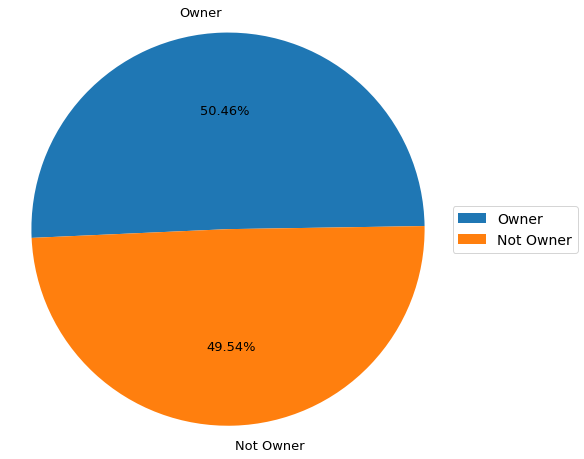

In [33]:
# let us check IsBorrowerHomeowner column
legend_label= ['Owner', 'Not Owner']
plt.figure(figsize=[8, 8])
owner = df_loan_Data_copy.IsBorrowerHomeowner.value_counts()
owner_data = np.array(owner)
plt.pie(owner_data, autopct='%1.2f%%', labels= legend_label, textprops={'fontsize': 13}, startangle= 0.90)
plt.legend(legend_label, loc ="center left", fontsize = 14,  bbox_to_anchor =(1, 0, 0.5, 1))
plt.axis('square')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The percentage of borrowers in sample who are not owners of their mortgages is close to borrowers who are owners of their mortgages. This is considered one of measurments that should impact the risk score and APR.But,  The close percentages in our data imply that this variable has less impact on APR and will not give us accurate further insights.

`Credit Score is one of variables lenders check when they assign APR rate and accept the loan.`

In [34]:
credit_cols = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
df_loan_Data_copy['CreditScoreRange'] = df_loan_Data_copy[credit_cols].apply(lambda row: ' - '.join(row.values.astype(str)), axis=1)
df_loan_Data_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScoreRange
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640,659,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,640 - 659
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680,699,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,680 - 699
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480,499,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,480 - 499
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800,819,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,800 - 819
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,

In [35]:
order_desc = df_loan_Data_copy.CreditScoreRange.sort_values(ascending=True)
order_desc = order_desc.astype('category')
order_desc.cat.categories

Index(['0 - 19', '360 - 379', '420 - 439', '440 - 459', '460 - 479',
       '480 - 499', '500 - 519', '520 - 539', '540 - 559', '560 - 579',
       '580 - 599', '600 - 619', '620 - 639', '640 - 659', '660 - 679',
       '680 - 699', '700 - 719', '720 - 739', '740 - 759', '760 - 779',
       '780 - 799', '800 - 819', '820 - 839', '840 - 859', '860 - 879',
       '880 - 899'],
      dtype='object')

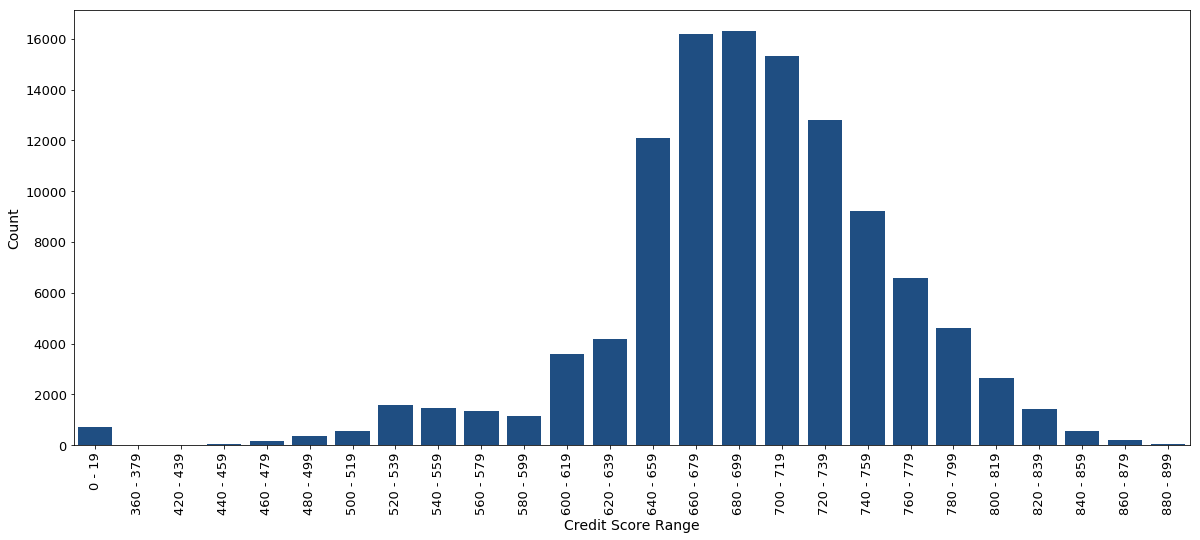

In [36]:
plt.figure(figsize=[20, 8])
sns.countplot(data=df_loan_Data_copy, x='CreditScoreRange', color='#0f4d92', order=order_desc.cat.categories)

plt.xlabel('Credit Score Range', fontsize=14)
plt.xticks(rotation='vertical', fontsize=13)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=13)
plt.show();

Most of the credit scores are in ranges from 600 to 800. It looks there are borrowers who really can handle the responsibility of covering their loans. these ranges are expected to have good APRs.

`Let us check the overall distibution of monthly income in the sample dataset.`

min value: 0.0, max value: 1750002.916667, mean: 5605.252082947773


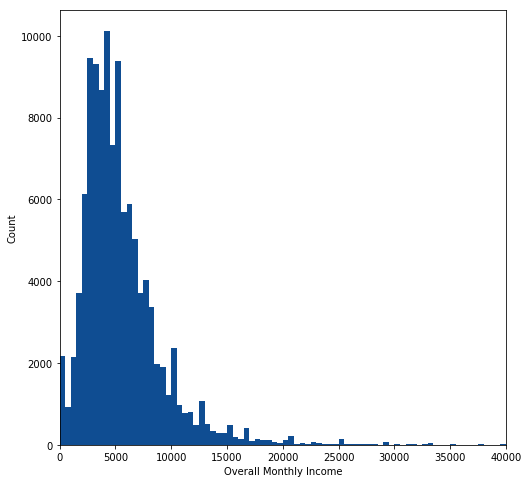

In [37]:
# plot histogram of  StatedMonthlyIncome column
print('min value: {}, max value: {}, mean: {}'.format(df_loan_Data_copy.StatedMonthlyIncome.min(), df_loan_Data_copy.StatedMonthlyIncome.max(), df_loan_Data_copy.StatedMonthlyIncome.mean()))
binsize = 500
bins = np.arange(0, 200000, binsize)


plt.figure(figsize=[8, 8])
plt.hist(data=df_loan_Data_copy,x='StatedMonthlyIncome', bins=bins, color='#0f4d92')
plt.xlabel('Overall Monthly Income')
plt.xlim(0, 40000)
plt.ylabel('Count')
plt.show();

The Monthly income is rightly skewed toward incomes less than 100K, besides the peak salaries gather around mean value more, with some outliers. let us check the the loan amounts next.

`Let us check the loan amount and monthly payment required for each loan`.

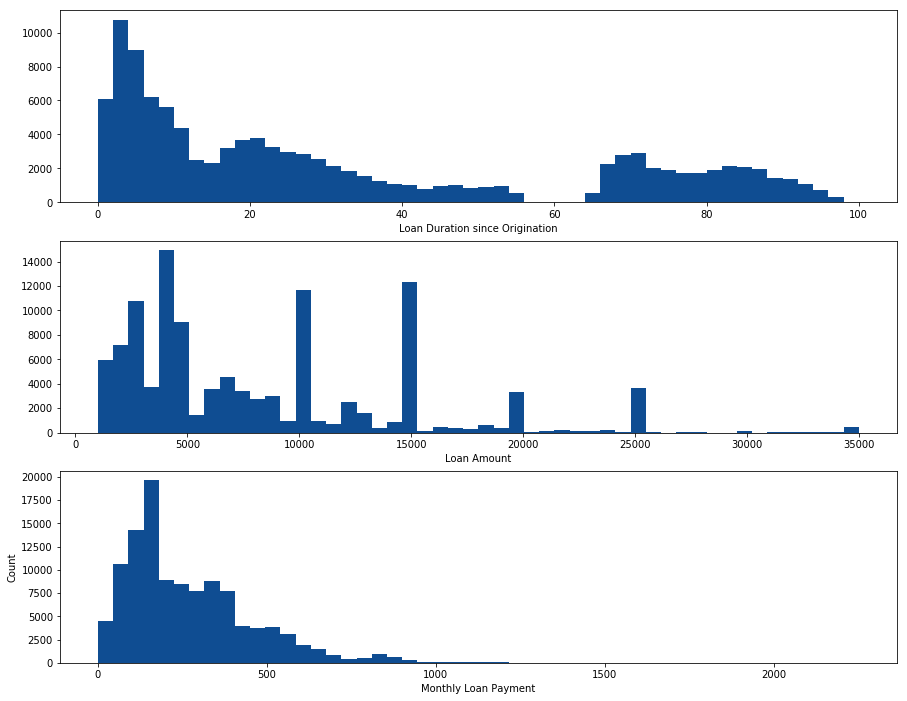

In [38]:
fig, ax = plt.subplots(nrows=3, figsize=[15, 12])

ax[0].hist(data=df_loan_Data_copy, x='LoanMonthsSinceOrigination', color='#0f4d92', bins=50)
ax[0].set_xlabel('Loan Duration since Origination')

ax[1].hist(data=df_loan_Data_copy, x='LoanOriginalAmount', color='#0f4d92', bins=50)
ax[1].set_xlabel('Loan Amount')

ax[2].hist(data=df_loan_Data_copy, x='MonthlyLoanPayment', color='#0f4d92', bins=50)
ax[2].set_xlabel('Monthly Loan Payment')


plt.ylabel('Count')
plt.show()

The peak loan durations are between 0 and 20 with average duration in range 20-60 and 80-100. The loan amounts overall are not large with peak values at 5000, 10000, 15000. Also, the overall amounts of loan and monthly payment compared to monthly income of borrowers shows positive measure that loans can get covered within their durations. 

`To have deeper insight on borrower's APRs with respect to their the loan, let us plot the 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate'`

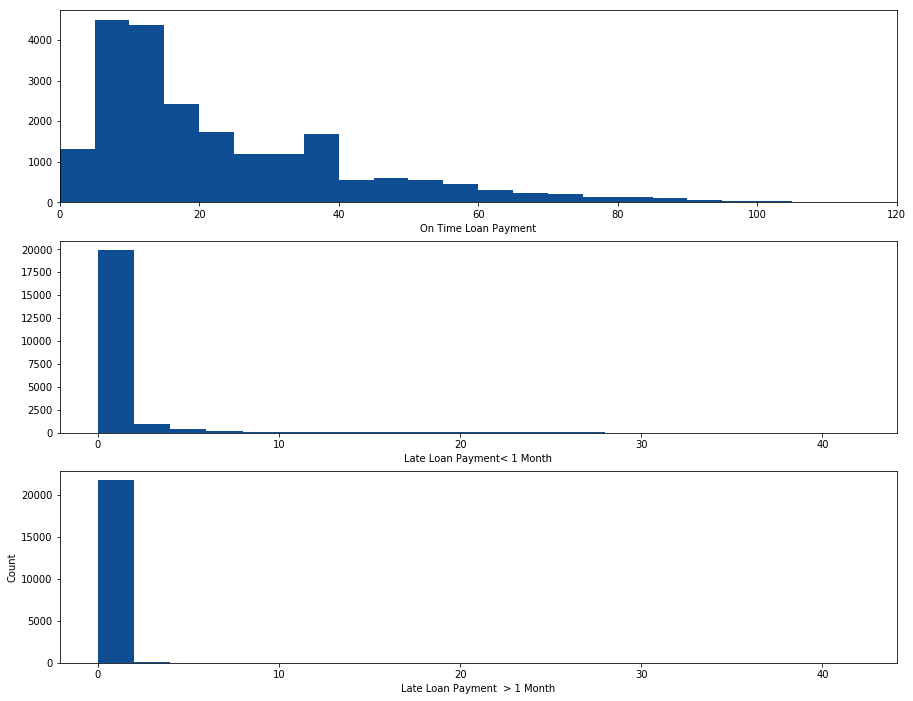

In [39]:
bins = np.arange(0, df_loan_Data_copy.TotalProsperPaymentsBilled.max()+5, 5)
bins_less_more = np.arange(0, df_loan_Data_copy.ProsperPaymentsLessThanOneMonthLate.max()+2, 2)
fig, ax = plt.subplots(nrows=3, figsize=[15, 12])

ax[0].hist(data=df_loan_Data_copy, x='TotalProsperPaymentsBilled', color='#0f4d92', bins=bins)
ax[0].set_xlim([0,120])
ax[0].set_xlabel('On Time Loan Payment')

ax[1].hist(data=df_loan_Data_copy, x='ProsperPaymentsLessThanOneMonthLate', color='#0f4d92', bins=bins_less_more)
#ax[1].set_xlim([-2,20])
ax[1].set_xlabel('Late Loan Payment< 1 Month')

ax[2].hist(data=df_loan_Data_copy, x='ProsperPaymentsOneMonthPlusLate', color='#0f4d92', bins=bins_less_more)
#ax[2].set_xlim([-2,6])
ax[2].set_xlabel('Late Loan Payment  > 1 Month')


plt.ylabel('Count')
plt.show()

From the small sample data recorded in payment variables, we deduce a small number of on time payments. Although these numbers are less encouraging for lenders, they cannot give us accurate insight(s). This problem is due to different factors for example: most of borrowers in sample data have these columns empty meaning they have no prior loans. Another reason might be the different durations of each loan. According to introductory plot, the late loan payment is not a good measure of the borrowers and doesn't encourage the lenders. Let us check more through bivariate exploration.

#### Conclusion of univariate visualizations:

Plotting each variable individually yields the follwoing results:<br>
`1` The APR rates are between 0 and 1 with no APR exceeding 55%.<br>
`2` Loan durations are long, with 36 months and more.<br>
`3` Most borrowers are employed or have income to cover their loans.<br>
`4` Risk scores lie in range 4 to 8.<br>
`5` Home owners vs. not owners or tenants are very close in percentages in sample dataset.<br>
`6` Borrowers credit scores are in range 600 to 800, which are good scores. Scores greater than 800 indicate a great borrower.<br>
`7` Most borrowers' income do not exceed 20000, with some outliers.<br>
`8` Loans and monthly payments overall can be covered easily with recorded income.<br>
`9` Number of on time and late payments donot give an accurate insight about data, since most of borrowers have no prior loans and durations of loans differ.<br>

**************************************************************************************************************************************************************************************************************************************************************


### Bivariate Exploration:

In this section, We will check the APR rate with its impacting variables. The main question is: how did each variable affect in decision of APR rate?

In [40]:
# numeric continuous variables
numeric_variables = ['BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
                     'StatedMonthlyIncome', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
                     'MonthlyLoanPayment', 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate',
                     'ProsperPaymentsOneMonthPlusLate']

# Categorical nominal and ordinal variables
#categorical_variables = ['Term', 'EmploymentStatus', 'ProsperScore', 'IsBorrowerHomeowner']

`Plot heatmap to check all numeric variables strength relation to APR rate.`

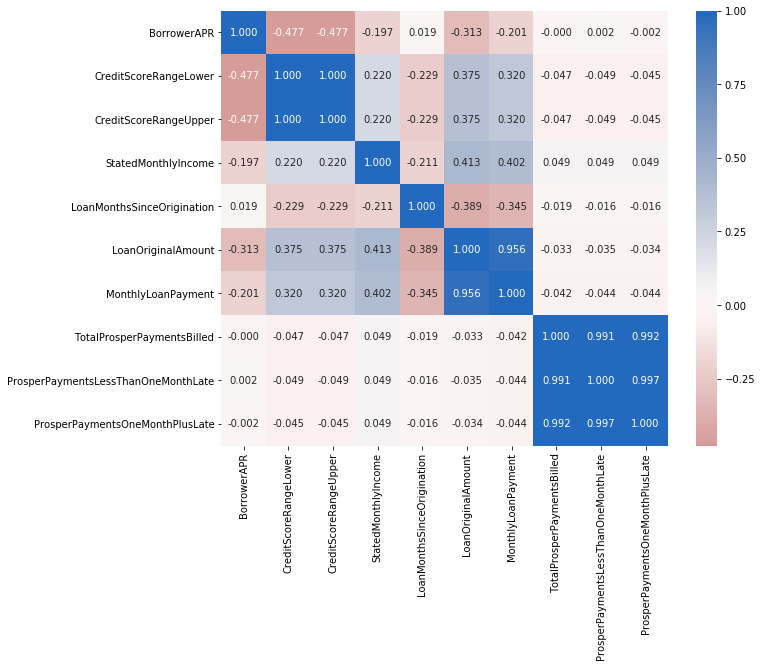

In [41]:
# Heat map plot
plt.figure(figsize=[10, 8])
sns.heatmap(df_loan_Data_copy[numeric_variables].corr(method='spearman'), annot=True,  fmt = '.3f',
           cmap = 'vlag_r', center = 0);

According to plotted heatmat using spearman's method ([[9]](#ref_9)), variabes show weak to moderate correlation relationships with the APR rate. From the samples recorded in the dataset, it is unclear what is the reason behind not having strong correlation between APR and monthly income or between APR and loan amount. Good thing is the data has correct logical correlation between variables in terms of positive or negative correlation. The reason behind using spearman instead of default pearson method in correlation calculation is the data is not normally distributed but right skewed toward specific range as shown in univariate section.

`Check APR rate for each prosper (risk) category.`

In [42]:
# Convert the "ProsperScore" column from a float into an ordered categorical type
df_loan_Data_copy.ProsperScore = df_loan_Data_copy.ProsperScore.sort_values(ascending=True)
df_loan_Data_copy.ProsperScore = df_loan_Data_copy.ProsperScore.astype('category')
df_loan_Data_copy.ProsperScore.cat.categories

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype='float64')

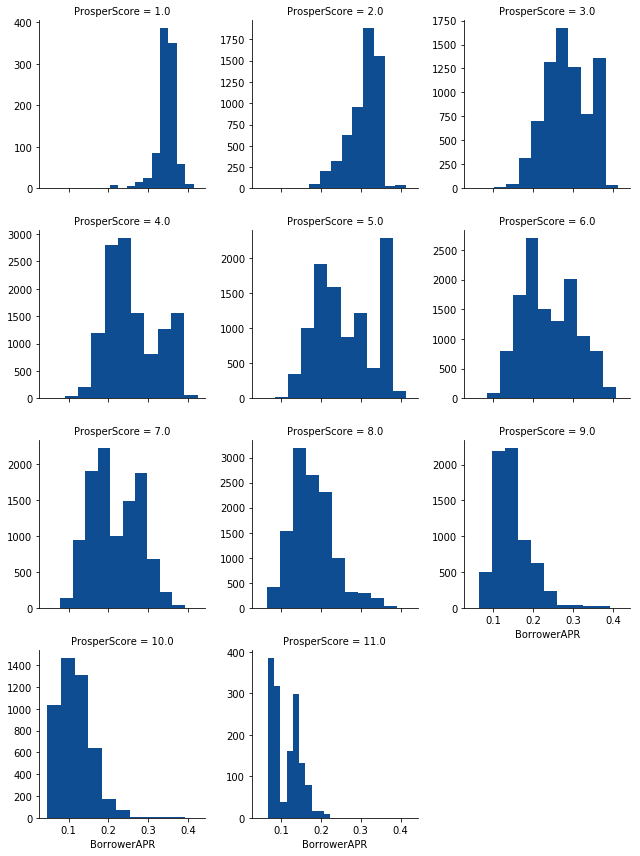

In [43]:
# Plot facet grid
graph = sns.FacetGrid(data=df_loan_Data_copy, col='ProsperScore', col_wrap=3, sharey=False)
graph.map(plt.hist, 'BorrowerAPR', color='#0f4d92');

We do not have a great proportion of borrowers with bad risk score 1 and 2; moreover, the peak APR rates of them are high more than 0.3. We have most of borrowers in risk score ranging from 3 to 8. The difference in range 3 to 8 is the peak APR rates for 3 is high since it is considered a bad score too. We start getting slightly lower peak APR rates at score 4. Score 5 has also high APR rates. From range 6 to 8, we have overall good APR rates in them, and great APR rates for range 9 to 11. The thing is we do have a small proportion of borrowers in best case range 9 to 11. Any unexpected high rate in bad score or low rate in good score might be due to other factors like credit score.

`Check APR rate for each Employment Status category.`

In [44]:
# Convert the "EmploymentStatus" column from a object into an nominal categorical type
df_loan_Data_copy.EmploymentStatus = df_loan_Data_copy.EmploymentStatus.astype('category')
df_loan_Data_copy.EmploymentStatus.cat.categories

Index(['Employed', 'Full-time', 'Not available', 'Not employed', 'Other',
       'Part-time', 'Retired', 'Self-employed'],
      dtype='object')

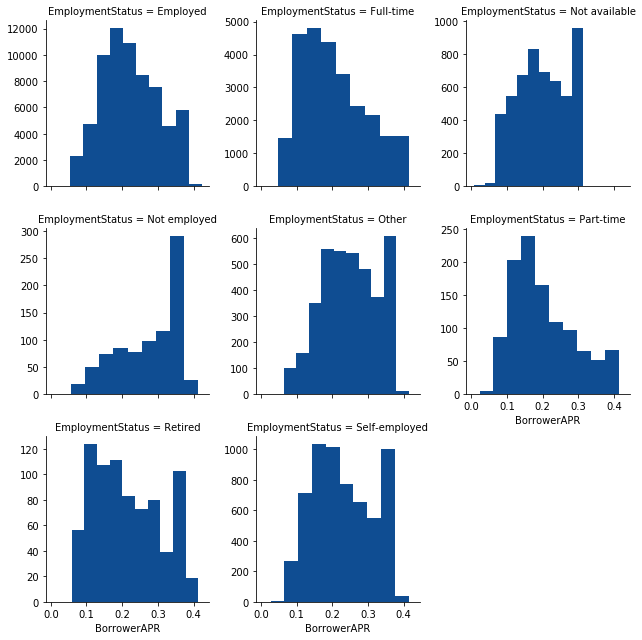

In [45]:
# Plot facet grid
graph = sns.FacetGrid(data=df_loan_Data_copy, col='EmploymentStatus', col_wrap=3, sharey=False)
graph.map(plt.hist, 'BorrowerAPR', color='#0f4d92');

The majority of borrowers are Employed(Employed, fulltime, parttime, selfemployed) and retired, with just small proportion not employed and not specified(not available). The APR rates shows right skewness toward lower APR rates for employed and retired borrowers. These visuals show the expected relation, which is lenders are comfortable with borrowers who have income. This relation results in low APR rates. since in not employed and not specified, borrowers do not have fixed income,  we see left skewness toward higher rates.

`Check APR rate for each Loan Duration category.`

In [46]:
# Convert the "Term" column from a object into an nominal categorical type
df_loan_Data_copy.Term = df_loan_Data_copy.Term.astype('category')
df_loan_Data_copy.Term.cat.categories

Int64Index([12, 36, 60], dtype='int64')

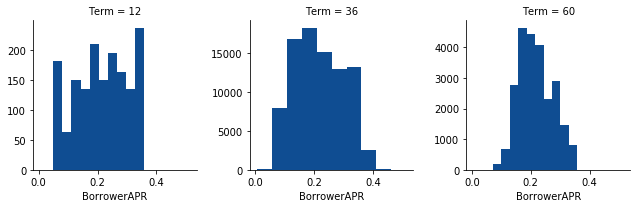

In [47]:
# Plot facet grid
graph = sns.FacetGrid(data=df_loan_Data_copy, col='Term', sharey=False)
graph.map(plt.hist, 'BorrowerAPR', color='#0f4d92');

We cannot get much interpretation from loan duration about APR. According to APR rules, high duration consistute high APR rates since it is a long time and lenders do not have guarantee after this long duration to get their money. This rule applies holding all other variables are constant. The case is the APR is suggested based on many factors and so term comes in lowest priority if these factors prove positive borrower.  From these visuals, we can deduce on average we have good but not great borrowers.

**Scale Transformation for deeper insights**:

In [48]:
# To compute the logarithm of any numeric continuous variable
def sqrt_log_trans(x, inverse=False):
    """Function to compute square root of log and power operations over variables or columns"""
    if not inverse:
        return np.sqrt(np.log10(x))
    else:
        return np.power(10, x)

In [49]:
def sqrt_root_trans(x, inverse = False):
    """ quick function for computing square root and square operations """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

`Check scaled monthly income against of scaled APR rate.`

In [50]:
df_loan_Data_copy['Income_sqrt_log'] = df_loan_Data_copy.StatedMonthlyIncome.apply(sqrt_log_trans)
df_loan_Data_copy['APR_sqrt'] = df_loan_Data_copy.BorrowerAPR.apply(sqrt_root_trans)

In [51]:
df_loan_Data_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScoreRange,Income_sqrt_log,APR_sqrt
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640,659,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,640 - 659,1.867892,0.406399
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680,699,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,680 - 699,1.946049,0.346641
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480,499,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,480 - 499,1.821746,0.531686
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800,819,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,-1,NaN,-1,-1,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,800 - 819,1.859741,0.353949
4,0F02358949965

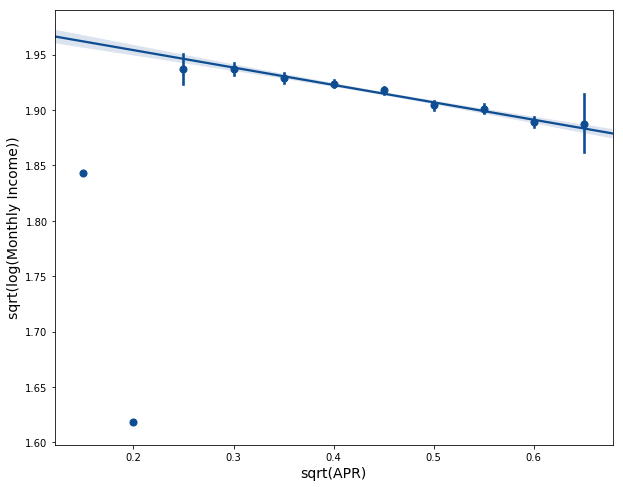

In [52]:
samples = np.random.choice(df_loan_Data_copy.shape[0], 10000, replace = False)
loan_data_samp = df_loan_Data_copy.loc[samples,:]

bin_size = 0.050
xbin_range = np.arange(0, loan_data_samp.APR_sqrt.max()+bin_size, bin_size)

plt.figure(figsize=[10, 8])
sns.regplot(loan_data_samp.APR_sqrt, loan_data_samp.Income_sqrt_log, color='#0f4d92', x_bins=xbin_range)
plt.xlabel('sqrt(APR)', fontsize=14)
plt.ylabel('sqrt(log(Monthly Income))', fontsize=14)
plt.show();

The heatmap, just plotted at the beginning of section, revealed that APR and Monthly income are negatively correlated. This is an expected outcome, since lenders are completely comfortable that they will get their money with covered or large income. The unexpected outcome is the correlation coefficient number which is closer to zero than one indicating a weak relationship. It requires further study by examining set of affecting variables. The plotting of raw variables gives us a cloud of points overlapping and close together. We cannot interpret anything from the raw plot. By scaling both variables with log function, we do not get anything different since it is not a strong linear relationship. Plotting the log of y against cubic root of x gives us anscombe's quartet. Since the final test gives anscombe's quartet, There should be a different way to look at the variables. What about bringing these dots closer together. Quick way to achieve this is through square root of numbers. Getting the square root of numbers achieved linear relationship, but with alot of outliers. This brought the conclusion of scaling the y axis using log to scale the Income and square rooting the scaled value. These operations helped us see the linearity clearer and simpler with few outliers. These plots reveals create confidence interval at low APRs with large income, which is considered confident point for lenders. [[10]](#ref_10) [[11]](#ref_11)

`Check scaled loan amount against of scaled APR rate.`

In [53]:
df_loan_Data_copy['Loan_sqrt_log'] = df_loan_Data_copy.LoanOriginalAmount.apply(sqrt_log_trans)

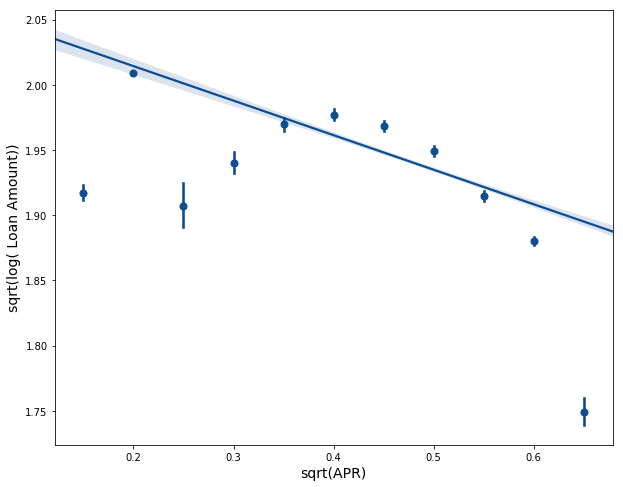

In [54]:
loan_data_samp = df_loan_Data_copy.loc[samples,:]
plt.figure(figsize=[10, 8])
sns.regplot(loan_data_samp.APR_sqrt, loan_data_samp.Loan_sqrt_log ,color='#0f4d92', x_bins=xbin_range)
plt.xlabel('sqrt(APR)', fontsize=14)
plt.ylabel('sqrt(log( Loan Amount))', fontsize=14)
plt.show();

As a result of the lender's confidence in borrowers' overall score and income, loans are expected to be negatively correlated with APR. If we keep all other vairables constant, it is expected to have positive correlation, which mean higher APR rates proportional to high loans.

`Check on Time Payment against APR rate.`

In [55]:
on_time_pay_times = df_loan_Data_copy.query('TotalProsperPaymentsBilled != -1')
#on_time_pay_times.TotalProsperPaymentsBilled.value_counts()

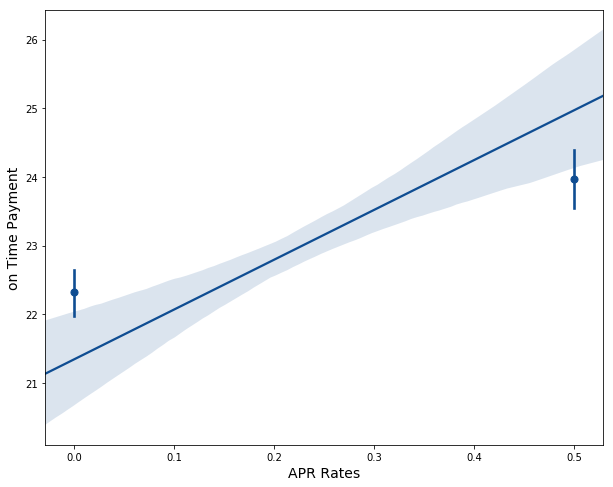

In [56]:
bin_size = 0.5
xbin_range = np.arange(0, df_loan_Data_copy.BorrowerAPR.max()+bin_size, bin_size)

plt.figure(figsize=[10, 8])
sns.regplot(on_time_pay_times.BorrowerAPR, on_time_pay_times.TotalProsperPaymentsBilled ,color='#0f4d92', x_bins=xbin_range)
plt.xlabel('APR Rates', fontsize=14)
plt.ylabel('on Time Payment', fontsize=14)
plt.show();

We have a small sample of borrowers with on time payments recorded, but they reveal a postive result that borrowers with high APR have more on time payments.If all borrowers are more keen with their on time payments, they with impact their overall score, which gives positive indication to lenders for future loans and low APRs 

`Check late loan less tham one month against APR rate.`

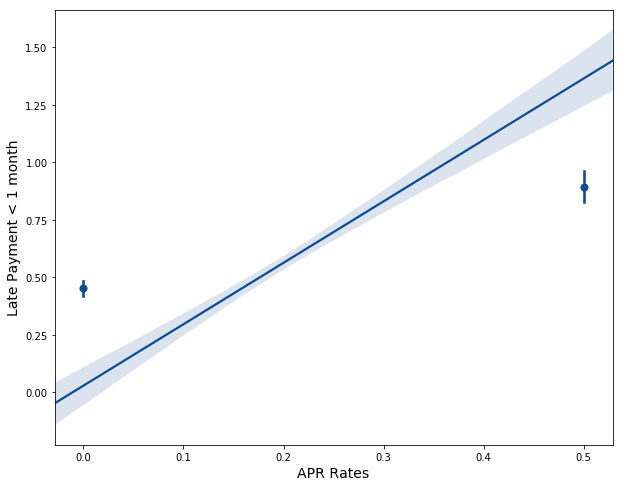

In [57]:
bin_size = 0.5
xbin_range = np.arange(0, df_loan_Data_copy.BorrowerAPR.max()+bin_size, bin_size)
plt.figure(figsize=[10, 8])
sns.regplot(on_time_pay_times.BorrowerAPR, on_time_pay_times.ProsperPaymentsLessThanOneMonthLate ,color='#0f4d92', x_bins=xbin_range)
plt.xlabel('APR Rates', fontsize=14)
plt.ylabel('Late Payment < 1 month', fontsize=14)
plt.show();


Unfortunately, the borrowers who paid some portion of loan on time also had late payments with duration less than 1 month. The confidence interval shades show small possibility above or beyond regression line.

`Check late loan more tham one month against APR rate.`

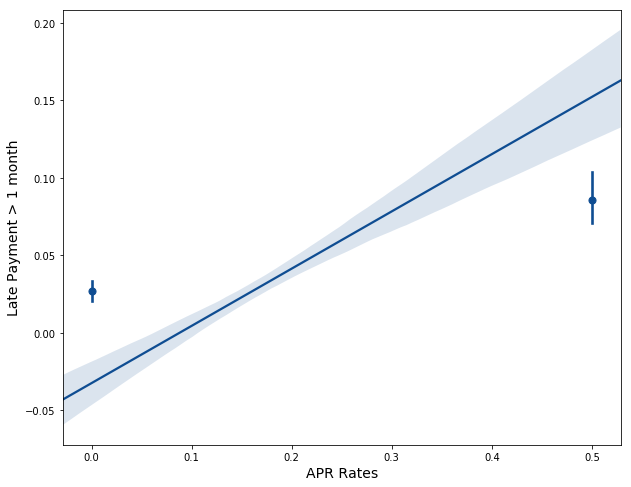

In [58]:
bin_size = 0.5
xbin_range = np.arange(0, df_loan_Data_copy.BorrowerAPR.max()+bin_size, bin_size)
plt.figure(figsize=[10, 8])
sns.regplot(on_time_pay_times.BorrowerAPR, on_time_pay_times.ProsperPaymentsOneMonthPlusLate ,color='#0f4d92', x_bins=xbin_range)
plt.xlabel('APR Rates', fontsize=14)
plt.ylabel('Late Payment > 1 month', fontsize=14)
plt.show();

Unfortunately, the borrowers who paid some portion of loan on time also had late payments with duration more than 1 month. The confidence interval shades show large possibility of late payments more than one month above or beyond regression line.

#### Conclusion of bivariate visualizations:
Bivariate reveals insights more than univariate and leads us to the following:

`*` Risk scores average (range 4-8) have low APRs on average, and high volumne of borrowers with little outliers. Bad risk (range 1-3) has high APR rates with small borrowers' population, and good risk score 9-11 has also small borrowers' population with low APR rates on average.<br>

`*` The APR rates based on employment status display the expected outcome with high range of borrowers emplyed and have a fixed income to cover their loans. There are outliers and exceptions in each status, but in very rare cases.<br>

`*` APR rates increase with decreasing income and decrease with increasing income, which is logical. Large income encourages lenders to give borrowers the loans they request. 

`*` On time payment and late payments columns are least reliable to draw conclusion with, since the variables have a very weak relationship with APR, besides only small sample of data is recorded. The small sample can not help us reach accurate results for example: it is normal for a loan with duration 12 months to have on time payments less than loan duration with 36 months.

**************************************************************************************************************************************************************************************************************************************************************

### Multivariate Exploration:

In this section, We will check the APR rate with its impacting variables <em>(only the reliable variables depicted from bivariate section)</em>. The main focus here is to plot graphs that depict more than one variable to dig deeper in data and get more detailed conclusions. 

`Check multivariate scaled monthly income and APR rate and EmploymentStatus.`

In [59]:
df_loan_Data_copy.Income_sqrt_log.min(), df_loan_Data_copy.Income_sqrt_log.max(), df_loan_Data_copy.Income_sqrt_log.mean()

(0.38893158462327787, 2.498607366616434, 1.9137945170222739)

In [60]:
df_loan_Data_copy.APR_sqrt.min(), df_loan_Data_copy.APR_sqrt.max(), df_loan_Data_copy.APR_sqrt.mean()

(0.08080841540334768, 0.7157443677738582, 0.45959393916080155)

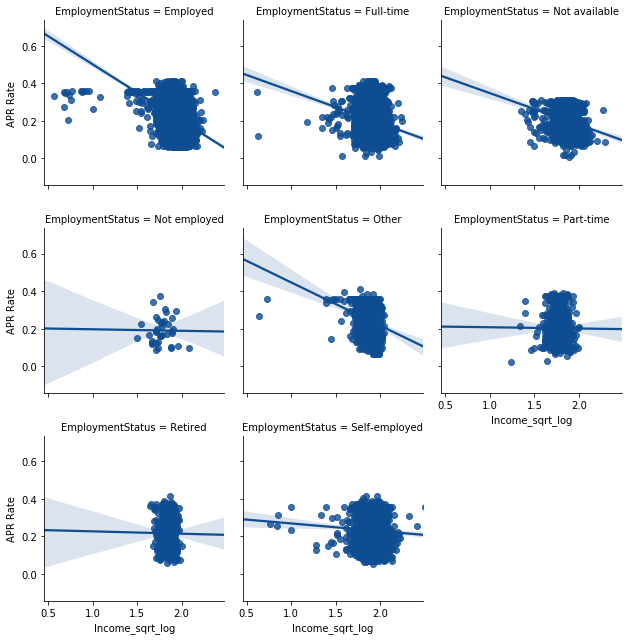

In [61]:
samples = np.random.choice(df_loan_Data_copy.shape[0], 50000, replace=False)
loan_data_samp = df_loan_Data_copy.loc[samples,:]

grids = sns.FacetGrid(data = loan_data_samp, col = 'EmploymentStatus', col_wrap = 3, size = 3)
grids.map(sns.regplot, 'Income_sqrt_log', 'BorrowerAPR',color='#0f4d92', scatter=True)
grids.set_ylabels('APR Rate')
grids.set_xlabels('Income_sqrt_log')

plt.show()

Plotting APR against scaled income with categorical variable employment status confirms the results of employment status in bivariate section with most of sample data. Employed borrowers record covered incomes; as a result, they get expected loans with good range APR rates. This result is not the case with all borrowers, because other factors affect APR decision.

`Check multivariate scaled monthly income and APR rate and prosper score.`

In [62]:
samples = np.random.choice(df_loan_Data_copy.shape[0], 10000, replace=False)
loan_data_samp = df_loan_Data_copy.loc[samples,:]

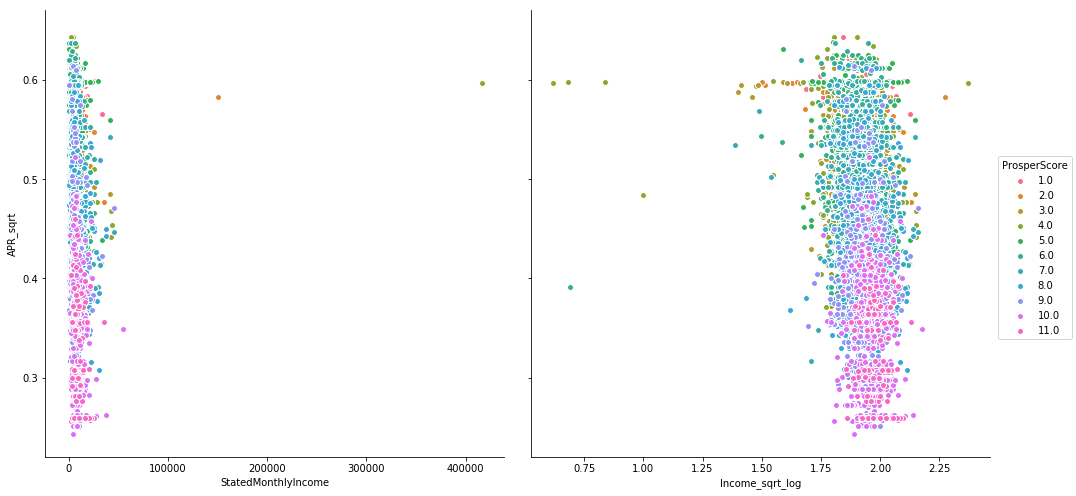

In [63]:
grid = sns.pairplot(
    loan_data_samp,
    x_vars=['StatedMonthlyIncome', 'Income_sqrt_log'],
    y_vars=["APR_sqrt"],
    hue='ProsperScore', 
    palette="husl",
    size=7
)
grid.map_lower(sns.kdeplot, levels=1, color=".2", multiple='stack');

The pairplot shows the decrease in APR rates as prosper scores increase. Most points in graph  indicate large population resides in scores 5, 6, 7, 8. We can also see how the score of 4 is visible more in high APR rates than low ones, with very little 1 and 2. The scaled plot reveals these interpretations more than raw plot.

`Check multivariate CreditScoreRangeUpper and APR rate and prosper score.`

In [64]:
df_loan_Data_copy.CreditScoreRangeUpper = df_loan_Data_copy.CreditScoreRangeUpper.sort_values(ascending=True)
df_loan_Data_copy.CreditScoreRangeUpper = df_loan_Data_copy.CreditScoreRangeUpper.astype('category')
df_loan_Data_copy.CreditScoreRangeUpper.cat.categories

Int64Index([ 19, 379, 439, 459, 479, 499, 519, 539, 559, 579, 599, 619, 639,
            659, 679, 699, 719, 739, 759, 779, 799, 819, 839, 859, 879, 899],
           dtype='int64')

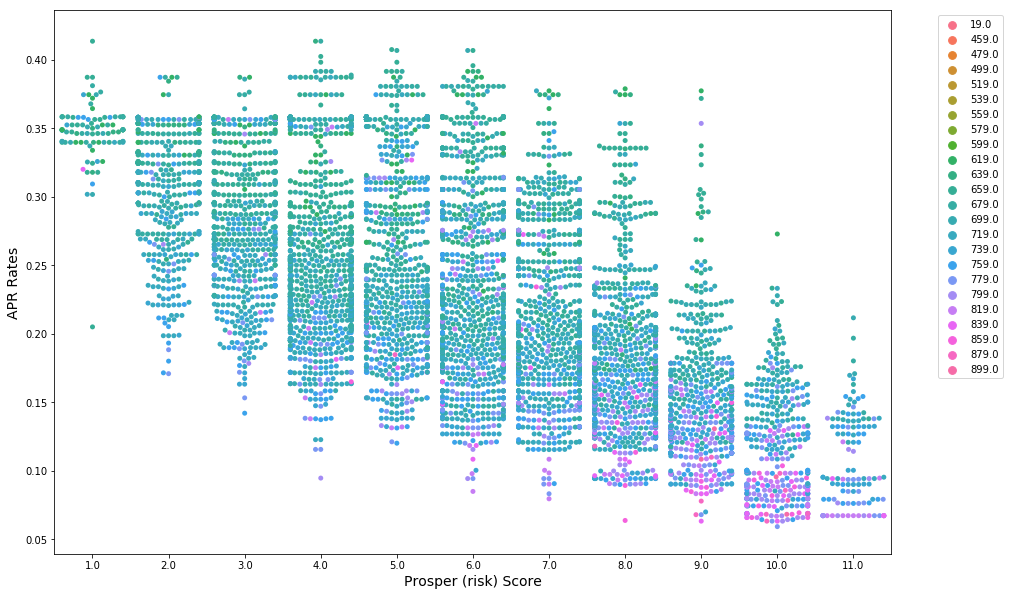

In [65]:
plt.figure(figsize=[15, 10])
sns.swarmplot(x="ProsperScore", y="BorrowerAPR",hue='CreditScoreRangeUpper',palette='husl', data=loan_data_samp)
lg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Prosper (risk) Score', fontsize=14)
plt.ylabel('APR Rates', fontsize=14)
plt.show();

This final plot leads us to proved conclusion. Risk score and credit scores are the main factors controlling the APR rates. Most of points lie in range 4 to 8, with credit scores 600 to 800(according to colors).

#### Conclusion of multivariate visualizations:

Plotting multivariate plots reveals more about the data and makes us rest assured with our final results: 

`*` The main affecting factors in APR rate are the credit score and risk score, comes next      employment status and and monthly income.

`*` The higher the credit score and risk score, the better or smaller the APR rate a borrower can get.

`*` The higher the monthly income, the higher the probability of borrower getting the loan with requested amount approved, but the APR takes other factors into consideration as stated in previous point.

`*` Most borrowers have their risk score between 4 and 8, which is average with 4 worse and 8 highest.

`*` Most borrowers have their credit scores between 600 and 800, with little exceeding 800 with high rates and little preceding 600 with low rates.

## References

<a id = 'ref_1'></a>
[1] Credit Score Guide:<br> https://www.cnbc.com/select/guide/credit-scores-for-beginners/#what-are-the-factors-that-make-up-your-credit-score

<a id = 'ref_2'></a>
[2] APR Guide: <br> https://www.cnbc.com/select/what-factors-lenders-consider-when-determining-apr/

<a id = 'ref_3'></a>
[3] Good credit Score:<br>https://www.cnbc.com/select/what-is-a-good-credit-score/

<a id = 'ref_4'></a>
[4] Debt to Income Ratio: <br>https://www.investopedia.com/terms/d/dti.asp <br> https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp

<a id = 'ref_5'></a>
[5] Revolving Account:<br> https://www.investopedia.com/terms/r/revolving-account.asp

<a id = 'ref_6'></a>
[6] Prosper Rating:<br>https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline

<a id = 'ref_7'></a>
[7] Get index based on value:<br> https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value

<a id = 'ref_8'></a>
[8] Remove NAN from NP Array:<br>https://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array

<a id = 'ref_9'></a>
[9] Correlation Methods:<br>https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/ <br>https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/ <br>https://www.geeksforgeeks.org/spearmans-rank-correlation/

<a id = 'ref_10'></a>
[10] anscombe's quartet:<br>
https://stats.stackexchange.com/questions/87273/difference-between-scale-transformation-and-statistical-transformation <br>
https://www.geeksforgeeks.org/anscombes-quartet/ <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

<a id = 'ref_11'></a>
[11] numpy operation to resolve anscombe's quartet issue: <br>
https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html <br>
https://numpy.org/doc/stable/reference/generated/numpy.log10.html <br>

<a id = 'ref_12'></a>
[12] Seaborn pairplot:<br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html <br>
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 <br>

[13] Hide warnings displayed:<br>
https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython